In [370]:
# These paths should be updated so that no files need to be downloaded...
import os
import sys
shared_path = '/Users/sarah/Downloads/TwitterResearch2020'
sys.path.append(shared_path)
import thinned_tweet_obj
import general_utilities
import matplotlib.pyplot as plt

import gdrive_quickstart, io
from googleapiclient.http import MediaIoBaseDownload

In [371]:
DRIVE = gdrive_quickstart.authenticate_drive_api()
file_objs_lst = gdrive_quickstart.get_file_objs_list(DRIVE, 'name contains "combined_tweets-2020"')

In [4]:
tweets_0626 = gdrive_quickstart.download_pkl_file(DRIVE, file_objs_lst[86], print_status=True)
tweets_0921 = gdrive_quickstart.download_pkl_file(DRIVE, file_objs_lst[0], print_status=True)

Download 85%.
Download 100%.
Download 44%.
Download 89%.
Download 100%.


In [22]:
def get_freq_users(obj_lst):
    freq_users = {}
    for thin_obj in obj_lst:
        user_id = thin_obj.get_user_id()
        if user_id in freq_users:
            freq_users[user_id] += 1
        else:
            freq_users[user_id] = 1
            
    return freq_users


def sort_freq_users(freq_users):
    return sorted(freq_users.items(), key = lambda x: x[1], reverse = True)

In [23]:
freq_users_0921 = get_freq_users(tweets_0921)

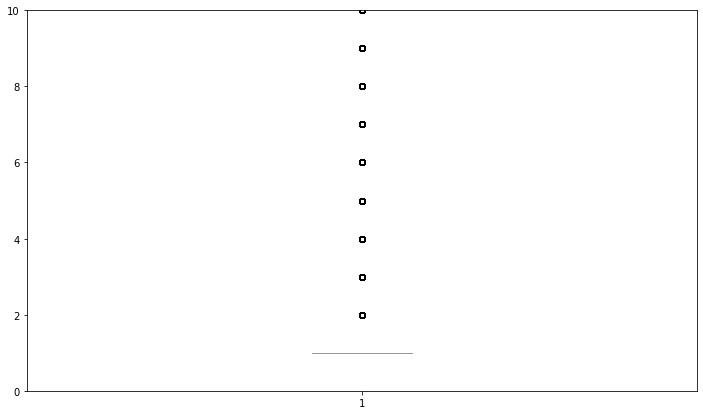

In [34]:
plt.figure(figsize=(12, 7))
plt.boxplot(freq_users_0921.values())
plt.ylim([0, 10])
# plt.hist(freq_users_0921.values(), bins=30, label='0921', histtype='step')
# plt.legend(loc='best')
plt.show()

In [39]:
import pandas as pd
import numpy as np

df_describe = pd.DataFrame(np.array(np.array(list(freq_users_0921.values()))))
df_describe.describe()

,0
count,193950.000000
mean,1.350864
std,3.880846
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1562.000000


In [61]:
sorted_vals_0921 = list(sorted(freq_users_0921.values(), reverse = True))

first1_id = sorted_vals_0921.index(1)
first2_id = sorted_vals_0921.index(2)
first5_id = sorted_vals_0921.index(5)
first10_id = sorted_vals_0921.index(10)

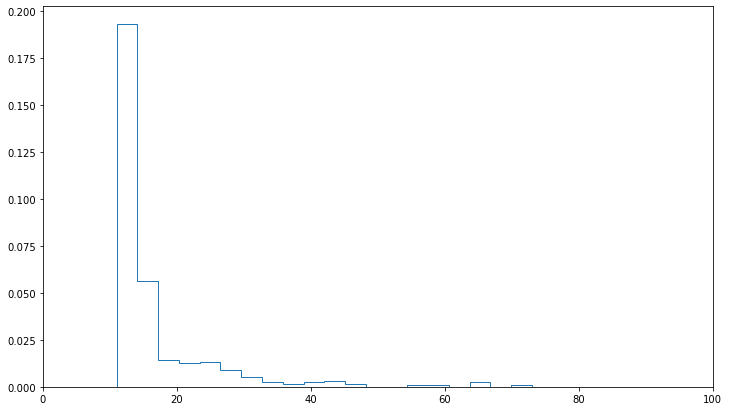

In [72]:
# sort_freq_users(freq_users_0921)[:first1_id]

plt.figure(figsize=(12, 7))
# plt.boxplot(sorted_vals_0921[:first1_id])
plt.hist(sorted_vals_0921[:first10_id], bins=500, density=True, label='0921', histtype='step')
plt.xlim([0, 100])
# plt.legend(loc='best')
plt.show()

Let's assume that > 20 tweets is indicative of bot activity. We will probably increase this value to maybe > 40 or 50

In [73]:
for file_obj in file_objs_lst:
    obj_lst = gdrive_quickstart.download_pkl_file(DRIVE, file_obj, print_status=True)
    
    bot_prop = 20 / len(obj_lst)

[{'kind': 'drive#file',
  'id': '1Pr-QT_DczcsJ8WTBIfvsajxrJSNwudgH',
  'name': 'combined_tweets-2020-09-21.pkl',
  'mimeType': 'application/octet-stream'},
 {'kind': 'drive#file',
  'id': '1KRMuNHdzIRN6xdt8Kd1rbmxhTUWg8jz-',
  'name': 'combined_tweets-2020-09-20.pkl',
  'mimeType': 'application/octet-stream'},
 {'kind': 'drive#file',
  'id': '1KCnDgKeCXzj0jqNf0dikI_A4KZdb-pAO',
  'name': 'combined_tweets-2020-09-19.pkl',
  'mimeType': 'application/octet-stream'},
 {'kind': 'drive#file',
  'id': '1Ia9o2ju-LIU2h3ELQGKYSmcdYlbC278m',
  'name': 'combined_tweets-2020-09-18.pkl',
  'mimeType': 'application/octet-stream'},
 {'kind': 'drive#file',
  'id': '10AE30m8yLyoPTVeOyx4GPsE0y1vpC1vG',
  'name': 'combined_tweets-2020-09-17.pkl',
  'mimeType': 'application/octet-stream'},
 {'kind': 'drive#file',
  'id': '15iuFhnp2gs-gg6kfNHxb0biH1VDTk3Y3',
  'name': 'combined_tweets-2020-09-16.pkl',
  'mimeType': 'application/octet-stream'},
 {'kind': 'drive#file',
  'id': '1zozG325_0Hlfi98466vXNPE_fT_J2k

## Benford's Law

Distribution of the leading digit

In [86]:
import math

def first_n_digits(num, n):
    return num // 10 ** (int(math.log(num, 10)) - n + 1)

In [91]:
# Discard value at i = 0 because it is the 'None' tag, doesn't identify one user
sorted_vals_0921 = list(sorted(freq_users_0921.values(), reverse = True))[1:]

In [97]:
grouped_0921 = {1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}
for num in sorted_vals_0921:
    first_num = first_n_digits(num, 1)
    grouped_0921[first_num] += 1

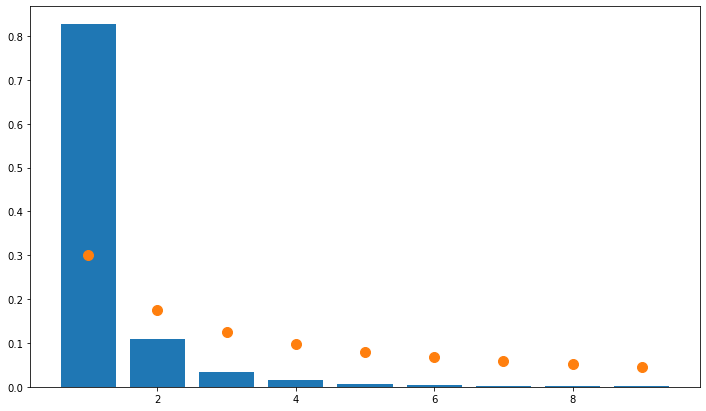

In [109]:
groups = list(grouped_0921.keys()) 
counts = list(grouped_0921.values())
total = sum(counts)
freq_counts = [count / total for count in counts]

BENFORD = [.301, .176, .125, .097, .079, .067, .058, .051, .046]

plt.figure(figsize=(12, 7))
plt.bar(groups, freq_counts, zorder=-1)
plt.scatter(groups, BENFORD, s=100, zorder=1)
plt.show()
  
# plt.xlabel("Courses offered") 
# plt.ylabel("No. of students enrolled") 
# plt.title("Students enrolled in different courses") 
# plt.show() 

Benford's law doesn't necessarily apply if the dataset doesn't contain many magnitudes (like number of tweets a day). Instead, lets look at the user's `total_tweets`. That should span multiple magnitudes and give us a better feel for bot activity.

In [120]:
def get_user_total_tweets(obj_lst):
    user_total_tweets = []
    for thin_obj in obj_lst:
        if thin_obj.user:
            user_total_tweets.append(thin_obj.user.total_tweets)
        
    return user_total_tweets

In [121]:
user_total_tweets_0921 = get_user_total_tweets(tweets_0921)

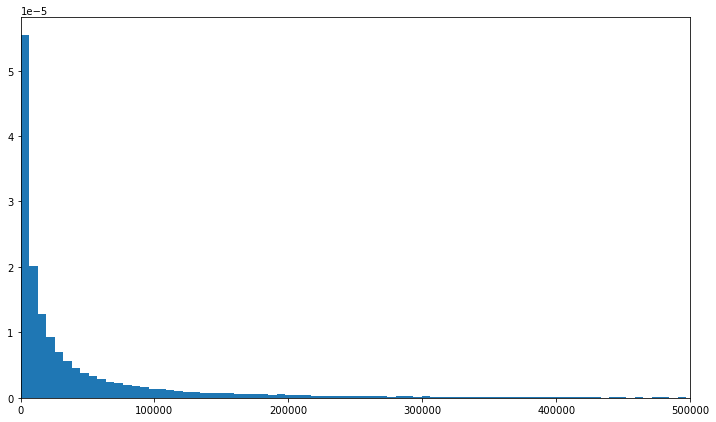

In [129]:
plt.figure(figsize=(12, 7))
plt.hist(user_total_tweets_0921, bins=5000, label='0921', density=True)
plt.xlim([0, 500000])
plt.show()

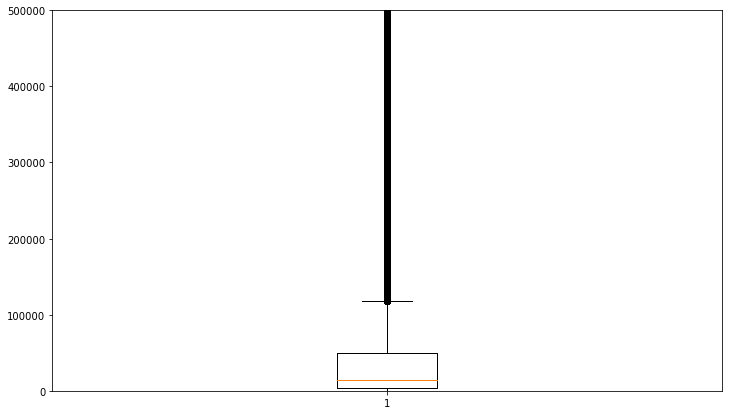

In [132]:
plt.figure(figsize=(12, 7))
plt.boxplot(user_total_tweets_0921)
plt.ylim([0, 500000])
plt.show()

# Lots of outliers!!!

We should also probably look at the user's `total_tweets` weighted by how long they've had their account (`account_created`).

In [172]:
import math


def first_digit(num):
    digits = int(math.log10(num))
    return num // 10 ** digits


def benfords(data):
    data_first_num = {1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}
    for num in data:
        first_num = first_digit(num)
        if first_num == 10:
            print(num)
        data_first_num[first_num] += 1
        
    groups = list(data_first_num.keys())
    counts = list(data_first_num.values())
    total = sum(counts)
    freq_counts = [count / total for count in counts]
    
    BENFORD = [.301, .176, .125, .097, .079, .067, .058, .051, .046]
    
    plt.figure(figsize=(12, 7))
    plt.bar(groups, freq_counts, zorder=-1)
    plt.scatter(groups, BENFORD, s=100, zorder=1)
    plt.show() 

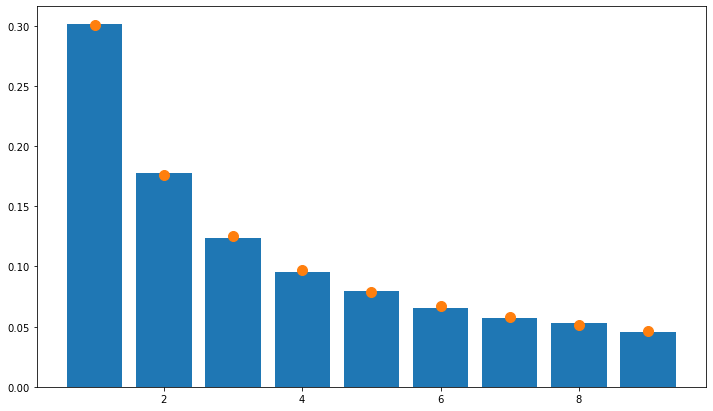

In [173]:
benfords(user_total_tweets_0921)

In [206]:
import datetime

def get_account_age(thin_obj):
    date_time_format = '%a %b %d %H:%M:%S %z %Y'
    date_time_obj = datetime.datetime.strptime(thin_obj.user.account_created, date_time_format)
    
    # Change this at some point with the data from the data (we can tell from the file_obj name)
    data_date = datetime.date(2020, 9, 21)
    account_age = (data_date - date_time_obj.date()).days
    if account_age == 0: return 1
    return account_age
    

In [217]:
def get_user_stats(obj_lst):
    user_total_tweets = []
    user_account_age = []
    user_avg_tweets_per_day = []
    for thin_obj in obj_lst:
        if thin_obj.user:
            total_tweets = thin_obj.user.total_tweets
            user_total_tweets.append(total_tweets)
            account_age = get_account_age(thin_obj)
            user_account_age.append(account_age)
            avg_tweets_per_day = total_tweets / account_age
            user_avg_tweets_per_day.append(avg_tweets_per_day)
    
    return user_total_tweets, user_account_age, user_avg_tweets_per_day

In [221]:
user_total_tweets_0921, user_account_age_0921, user_avg_tweets_per_day_0921 = get_user_stats(tweets_0921)
user_avg_tweets_over1_0921 = [val for val in user_avg_tweets_per_day_0921 if val >= 1]

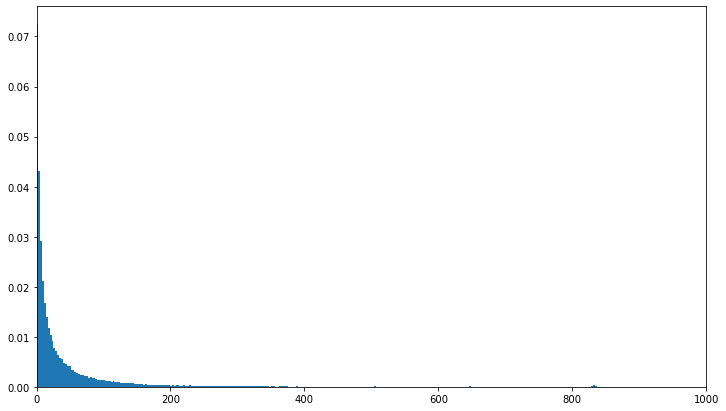

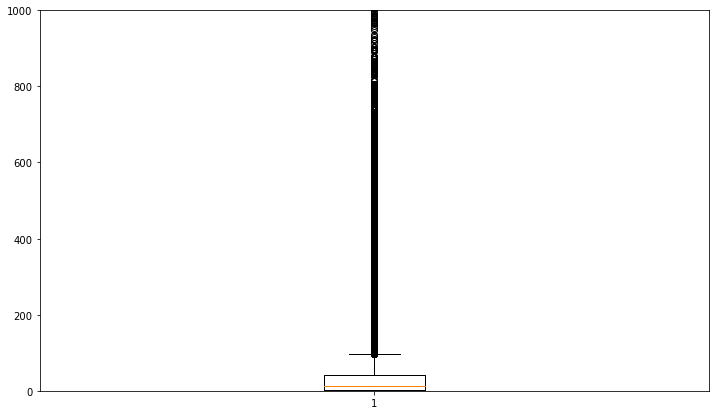

In [216]:
# Approximate average tweets per day

plt.figure(figsize=(12, 7))
plt.hist(user_avg_tweets_per_day_0921, bins=5000, label='0921', density=True)
plt.xlim([0, 1000])
plt.show()

plt.figure(figsize=(12, 7))
plt.boxplot(user_avg_tweets_per_day_0921)
plt.ylim([0, 1000])
plt.show()

# Lots of outliers!

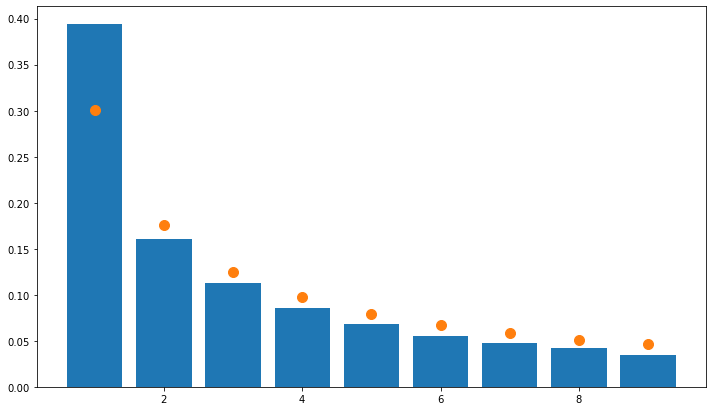

In [222]:
benfords(user_avg_tweets_over1_0921)

Ideas to further investigate:
- let's develop a dictionary of frequent tweeters (those that tweet over a certain amount in each sample)
    - lifetime (when we first saw it - last saw it, based on account created date too?)
    - relevant tweet information
- let's develop a list of those who tweet more than average (based on account created date, number of tweets in the account)

In [310]:
# Frequent tweeters across time

# class FreqUser(object):
#     def __init__(self, thin_obj):
#         self.user_id = thin_obj.get_user_id()
#         self.screen_name = thin_obj.user.screen_name
#         self.total_tweets = thin_obj.user.total_tweets
#         self.account_age = get_account_age(thin_obj)


p = 0.0001
freq_users_to_count_lst = {}  ## user_id to list of tweet counts (in our sample)
# freq_users_to_obj = {}  ## user_id to FreqUser obj
obs_lst = file_objs_lst[-5::-1]
n_obs = len(obs_lst)
for i, file_obj in enumerate(obs_lst):
    thinned_tweets = gdrive_quickstart.download_pkl_file(DRIVE, file_obj, print_status=False)
    
    threshold = round(len(thinned_tweets) * p)
    freq_users = get_freq_users(thinned_tweets)
    sorted_freq_users = sort_freq_users(freq_users)
    for user_id, tweet_count in sorted_freq_users:
        if tweet_count > threshold:
            # Add lifetime
            if user_id in freq_users_to_count_lst:
                freq_lst = freq_users_to_count_lst[user_id]
            else:
                freq_lst = [0] * n_obs
            freq_lst[i] = tweet_count
            freq_users_to_count_lst[user_id] = freq_lst
#                 freq_users_to_obj[user_id] = FreqUser(thin_)
        else:
            break

ConnectionResetError: [Errno 54] Connection reset by peer

In [259]:
p = 0.0001
freq_users_to_count_lst = {}  ## user_id to list of tweet counts (in our sample)
# freq_users_to_obj = {}  ## user_id to FreqUser obj
obs_lst = file_objs_lst[-5::-1]
n_obs = len(obs_lst)
for i, file_obj in enumerate(file_objs_lst[0:2]):
    thinned_tweets = gdrive_quickstart.download_pkl_file(DRIVE, file_obj, print_status=False)
    
    threshold = round(len(thinned_tweets) * p)
    freq_users = get_freq_users(thinned_tweets)
    sorted_freq_users = sort_freq_users(freq_users)
    for user_id, tweet_count in sorted_freq_users:
        if tweet_count > threshold:
            # Add lifetime
            if user_id in freq_users_to_count_lst:
                freq_lst = freq_users_to_count_lst[user_id]
            else:
                freq_lst = [0] * n_obs
            freq_lst[i] = tweet_count
            freq_users_to_count_lst[user_id] = freq_lst
#                 freq_users_to_obj[user_id] = FreqUser(thin_)
        else:
            break

59807716
736905000593575936
56597669
1141158911946309632
1275843884409589761
1241530223381950464
806117142475264000
1161674254125060096
1222573581248401408


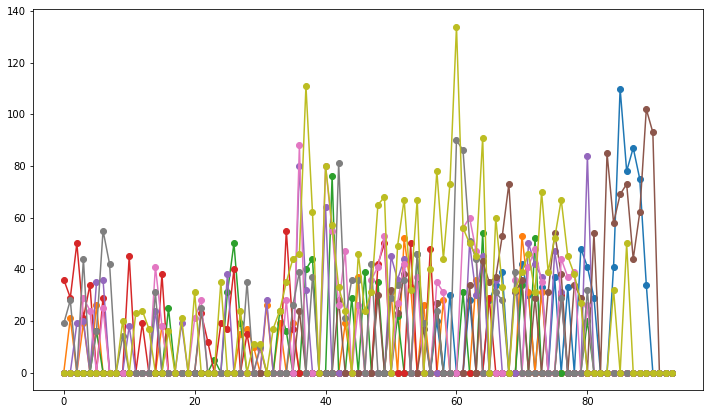

In [361]:
# Longest living (consistently great amount of tweets)

f_arr = np.array(list(freq_users_to_count_lst.values())[1:])
# Users that appear most frequently
ids_to_plot = np.argsort(np.sum(f_arr > 0, axis=1))[-10:-1]
# ids_to_plot = np.where(np.sum(f_arr == 0, axis=1) == 0)[0]

plt.figure(figsize=(12, 7))
for lst_id in ids_to_plot:
    plt.plot(np.arange(n_obs), f_arr[lst_id], "-o")
    print(user_id_lst[lst_id])
plt.show()

In [356]:
ids_to_plot

array([2072,   75,   16,  218])

In [354]:
np.argsort(np.sum(f_arr > 0, axis=1))[-10:]
# np.where(np.sum(f_arr > 0, axis=1) == 55)[0]
user_id_lst = list(freq_users_to_count_lst)[1:]

In [355]:
freq_id = user_id_lst[50]
print(freq_id)
# 59807716 = cheese24k
# 736905000593575936 = cowards_are_us
# 56597669 = jessie4324
# 1141158911946309632 = S_N_Pert_Sun
# 1275843884409589761 = MilitaryStart4 (definitely seems like a bot)
# 1241530223381950464 = Wunsa7 (hmmm, a lot of retweets)
# 806117142475264000 = HeARTofGod99 (definitely seems like a bot - weird capitalization + names)
# 1161674254125060096 = SPICYMOOSEBALLS (definitely seems like a bot)
# 1222573581248401408 = JoanMWallis1 (hmmm, a lot of retweets and activity)
# 938533034659168256 = openletterbot

938533034659168256


29 1248711184359936000
2605 67469714
2251 1237286356621148160
1801 1256925582522290176
2096 3314930810
2269 1287812148844990471
2465 1294715455807148035
2259 1249342792578396160
2295 1266079982952108033


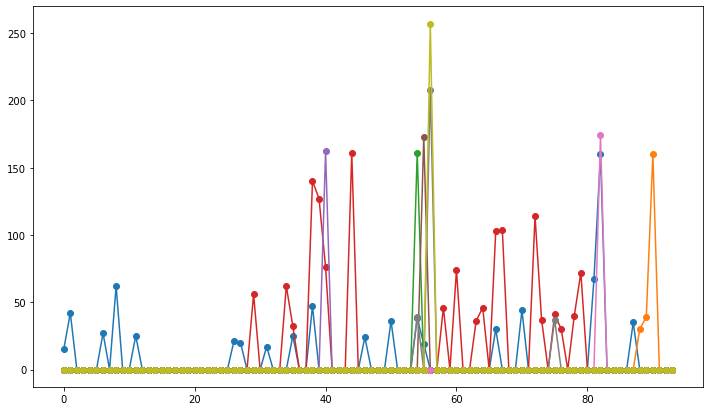

2251 1237286356621148160
2269 1287812148844990471
2295 1266079982952108033


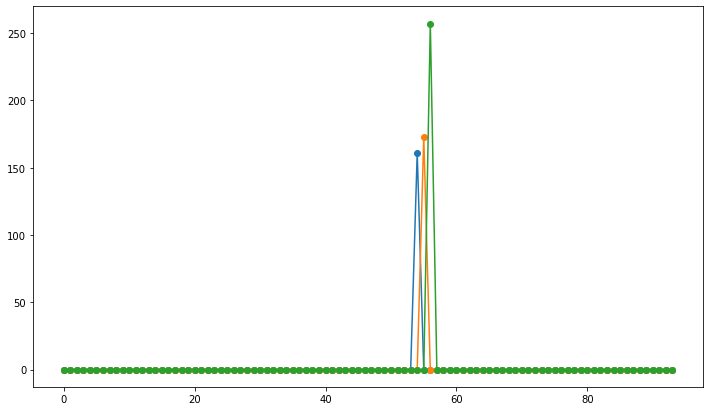

In [360]:
# Greatest amount of tweets

f_arr = np.array(list(freq_users_to_count_lst.values())[1:])
# Users that have the greatest amount of tweets
ids_to_plot = np.argsort(np.amax(f_arr, axis = 1))[-10:-1]
# ids_to_plot = np.where(np.sum(f_arr == 0, axis=1) == 0)[0]

plt.figure(figsize=(12, 7))
for lst_id in ids_to_plot:
    plt.plot(np.arange(n_obs), f_arr[lst_id], "-o")
    print(lst_id, user_id_lst[lst_id])
plt.show()

# These spikes occur between the DNC and RNC
plt.figure(figsize=(12, 7))
for lst_id in [2251, 2269, 2295]:
    plt.plot(np.arange(n_obs), f_arr[lst_id], "-o")
    print(lst_id, user_id_lst[lst_id])
plt.show()

# 1248711184359936000 = gmachickk (lots of retweet activity)
# 67469714 = mugslypdc (seems like a person, has had an account since 2009 and doesn't have very many tweets)
# 1237286356621148160 = user id not found
# 1256925582522290176 = JonScherm (hmm lots of activity)
# 3314930810 = ElGatoL0c0 (unsure, doesn't seem political)
# 1287812148844990471 = user id not found
# 1294715455807148035 = Roblocal591 (not too much activity, but seems like a lot of retweets especially of local radio station)
# 1249342792578396160 = chinairanrassho (sus, a lot of retweets)
# 1266079982952108033 = user id not found

In [402]:
np.argmax(f_arr[2251])

54

In [403]:
# 56, (now 52) looking for user_id 1266079982952108033
# tweets_0823 = gdrive_quickstart.download_pkl_file(DRIVE, obs_lst[52], print_status=True)
# tweets_0822 = gdrive_quickstart.download_pkl_file(DRIVE, obs_lst[51], print_status=True)
tweets_0821 = gdrive_quickstart.download_pkl_file(DRIVE, obs_lst[50], print_status=True)

sus_user_objs_2251 = []
for thin_obj in tweets_0821:
    user_id = thin_obj.get_user_id()
    if user_id == '1237286356621148160':
        sus_user_objs_2251.append(thin_obj)

Download 49%.
Download 99%.
Download 100%.


In [404]:
# 2295 looks like some a fan account for a mexican actor??
# 2269 ^^^ SAME
# 2251 ^^^ SAME

len(sus_user_objs_2251)  ## 257, matches what we expect from f_arr[lst_id = 2295]
for thin_obj in sus_user_objs_2251:
    print(thin_obj.__dict__)
    print()

{'tweet_id': '1296874235382595585', 'text': 'RT @11nastasia1: #ÇağlarErtuğrul 🌎 dünya çapında seyahat 🌍 #AyKer 🌏 #KeremYiğiter 222', 'hashtags': ['ÇağlarErtuğrul', 'AyKer', 'KeremYiğiter'], 'mentions': [{'screen_name': '11nastasia1', 'name': 'Настасья💙', 'id': 1250686875804860416, 'id_str': '1250686875804860416', 'indices': [3, 15]}], 'user': <thinned_tweet_obj.tweet_user object at 0x7fe2ce1e7fd0>, 'retweet': <thinned_tweet_obj.tweet object at 0x7fe2ce1ec050>, 'retweet_count': 0, 'in_reply': '', 'quote': None, 'quote_status': False}

{'tweet_id': '1296874249831972869', 'text': 'RT @11nastasia1: #ÇağlarErtuğrul 🌎 dünya çapında seyahat 🌍 #AyKer 🌏 #KeremYiğiter 218', 'hashtags': ['ÇağlarErtuğrul', 'AyKer', 'KeremYiğiter'], 'mentions': [{'screen_name': '11nastasia1', 'name': 'Настасья💙', 'id': 1250686875804860416, 'id_str': '1250686875804860416', 'indices': [3, 15]}], 'user': <thinned_tweet_obj.tweet_user object at 0x7fe2ce317290>, 'retweet': <thinned_tweet_obj.tweet object at 0x7fe2ce3172

In [315]:
row_sum = np.sum(f_arr, axis=1)
row_sum
freq_users_to_count_lst

{None: [761,
  846,
  697,
  957,
  767,
  793,
  824,
  858,
  845,
  638,
  896,
  769,
  885,
  841,
  873,
  812,
  791,
  762,
  817,
  786,
  810,
  787,
  413,
  77,
  784,
  813,
  690,
  663,
  720,
  299,
  505,
  680,
  832,
  705,
  809,
  686,
  975,
  1530,
  1588,
  1471,
  3266,
  1455,
  1357,
  906,
  1594,
  1406,
  907,
  950,
  1506,
  1641,
  1383,
  1166,
  1532,
  1675,
  1470,
  753,
  1085,
  1023,
  1591,
  1774,
  2934,
  1517,
  1461,
  1426,
  1623,
  1498,
  1482,
  1424,
  1430,
  1388,
  1641,
  1485,
  1570,
  1651,
  1376,
  1305,
  1567,
  1555,
  1542,
  1286,
  818,
  1561,
  3092,
  1595,
  1562,
  1429,
  1625,
  1570,
  1583,
  1526,
  1516,
  0,
  0,
  0],
 '122387014': [40,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,

In [232]:
round(len(tweets_0921) * .0001)

def get_freq_users(obj_lst):
    freq_users = {}
    for thin_obj in obj_lst:
        user_id = thin_obj.get_user_id()
        if user_id in freq_users:
            freq_users[user_id] += 1
        else:
            freq_users[user_id] = 1
            
    return freq_users


def sort_freq_users(freq_users):
    return sorted(freq_users.items(), key = lambda x: x[1], reverse = True)

26

What have we found so far that's indicative of a bot?

- 'bot' in user name
- weirdly cased user name and tweets (a lot of upper case in the tweets themselves)
- a lot of retweets
- high tweets to account age ratio
- short lived (user id not found, single spike)
- long lived bots seem to have more capitalization